TITLE

INTRODUCTION

PRELIMINARY DATA ANALYSIS

In [186]:
#run this cell first
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [187]:
# read in the heart disease data, rename the column name and mutate all columns to be numeric
heart_disease_data <- read_csv("processed.switzerland.data", col_names = FALSE) %>%
                        mutate_if(is.character, as.numeric) %>%
                        rename(age = X1, sex = X2, chest_pain_type = X3, resting_BP = X4, cholesteral = X5, fasting_bs = X6, rest_ecg = X7,
                                  max_hr = X8, ex_angina = X9, st_depression = X10, slope_st = X11, num_major_vessels = X12, thal = X13, diagnosis = X14)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Warning message:
“Problem with `mutate()` input `X4`.
ℹ NAs introduced by coercion
ℹ Input `X4` is `.Primitive("as.double")(X4)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `X6`.
ℹ NAs introduced by coercion
ℹ Input `X6` is `.Primitive("as.double")(X6)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `X7`.
ℹ NAs introduced by coercion
ℹ Input `X7` is `.Primitive("as.double")(X7)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coerci

In [188]:
# mutate the diagnosis and sex column to be a factor
heart_disease_data <- mutate(heart_disease_data, diagnosis = as.factor(diagnosis))

# Select useful columns , remove any rows that contain NA
heart_disease_data <- select(heart_disease_data, age, sex, chest_pain_type, resting_BP, rest_ecg, max_hr, ex_angina, st_depression, slope_st, thal, diagnosis) %>%
                        na.omit()
heart_disease_data

age,sex,chest_pain_type,resting_BP,rest_ecg,max_hr,ex_angina,st_depression,slope_st,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
36,1,4,110,0,125,1,1,2,6,1
38,0,4,110,0,156,0,0,2,3,1
38,1,3,115,0,128,1,0,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
70,1,4,115,1,92,1,0,2,7,1
70,1,4,140,0,157,1,2,2,7,3
73,0,3,160,1,121,0,0,1,3,1


In [189]:
# Group by diagnosis and find average age, resting blood pressure and maximum heart rate achieved, and the number of observations
heart_disease_data_sum <- heart_disease_data %>%
                    select(age,resting_BP, max_hr, diagnosis)%>%
                    group_by(diagnosis)%>%
                    summarize(avg_age = round(mean(age), digit = 1),
                              avg_resting_BP = round(mean(resting_BP)),
                              avg_max_hr = round(mean(max_hr)),
                              num_obs = n())
heart_disease_data_sum

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,avg_age,avg_resting_BP,avg_max_hr,num_obs
<fct>,<dbl>,<dbl>,<dbl>,<int>
0,56.0,120,97,1
1,55.4,133,116,16
2,55.0,138,116,18
3,58.5,139,110,17
4,52.0,122,112,3


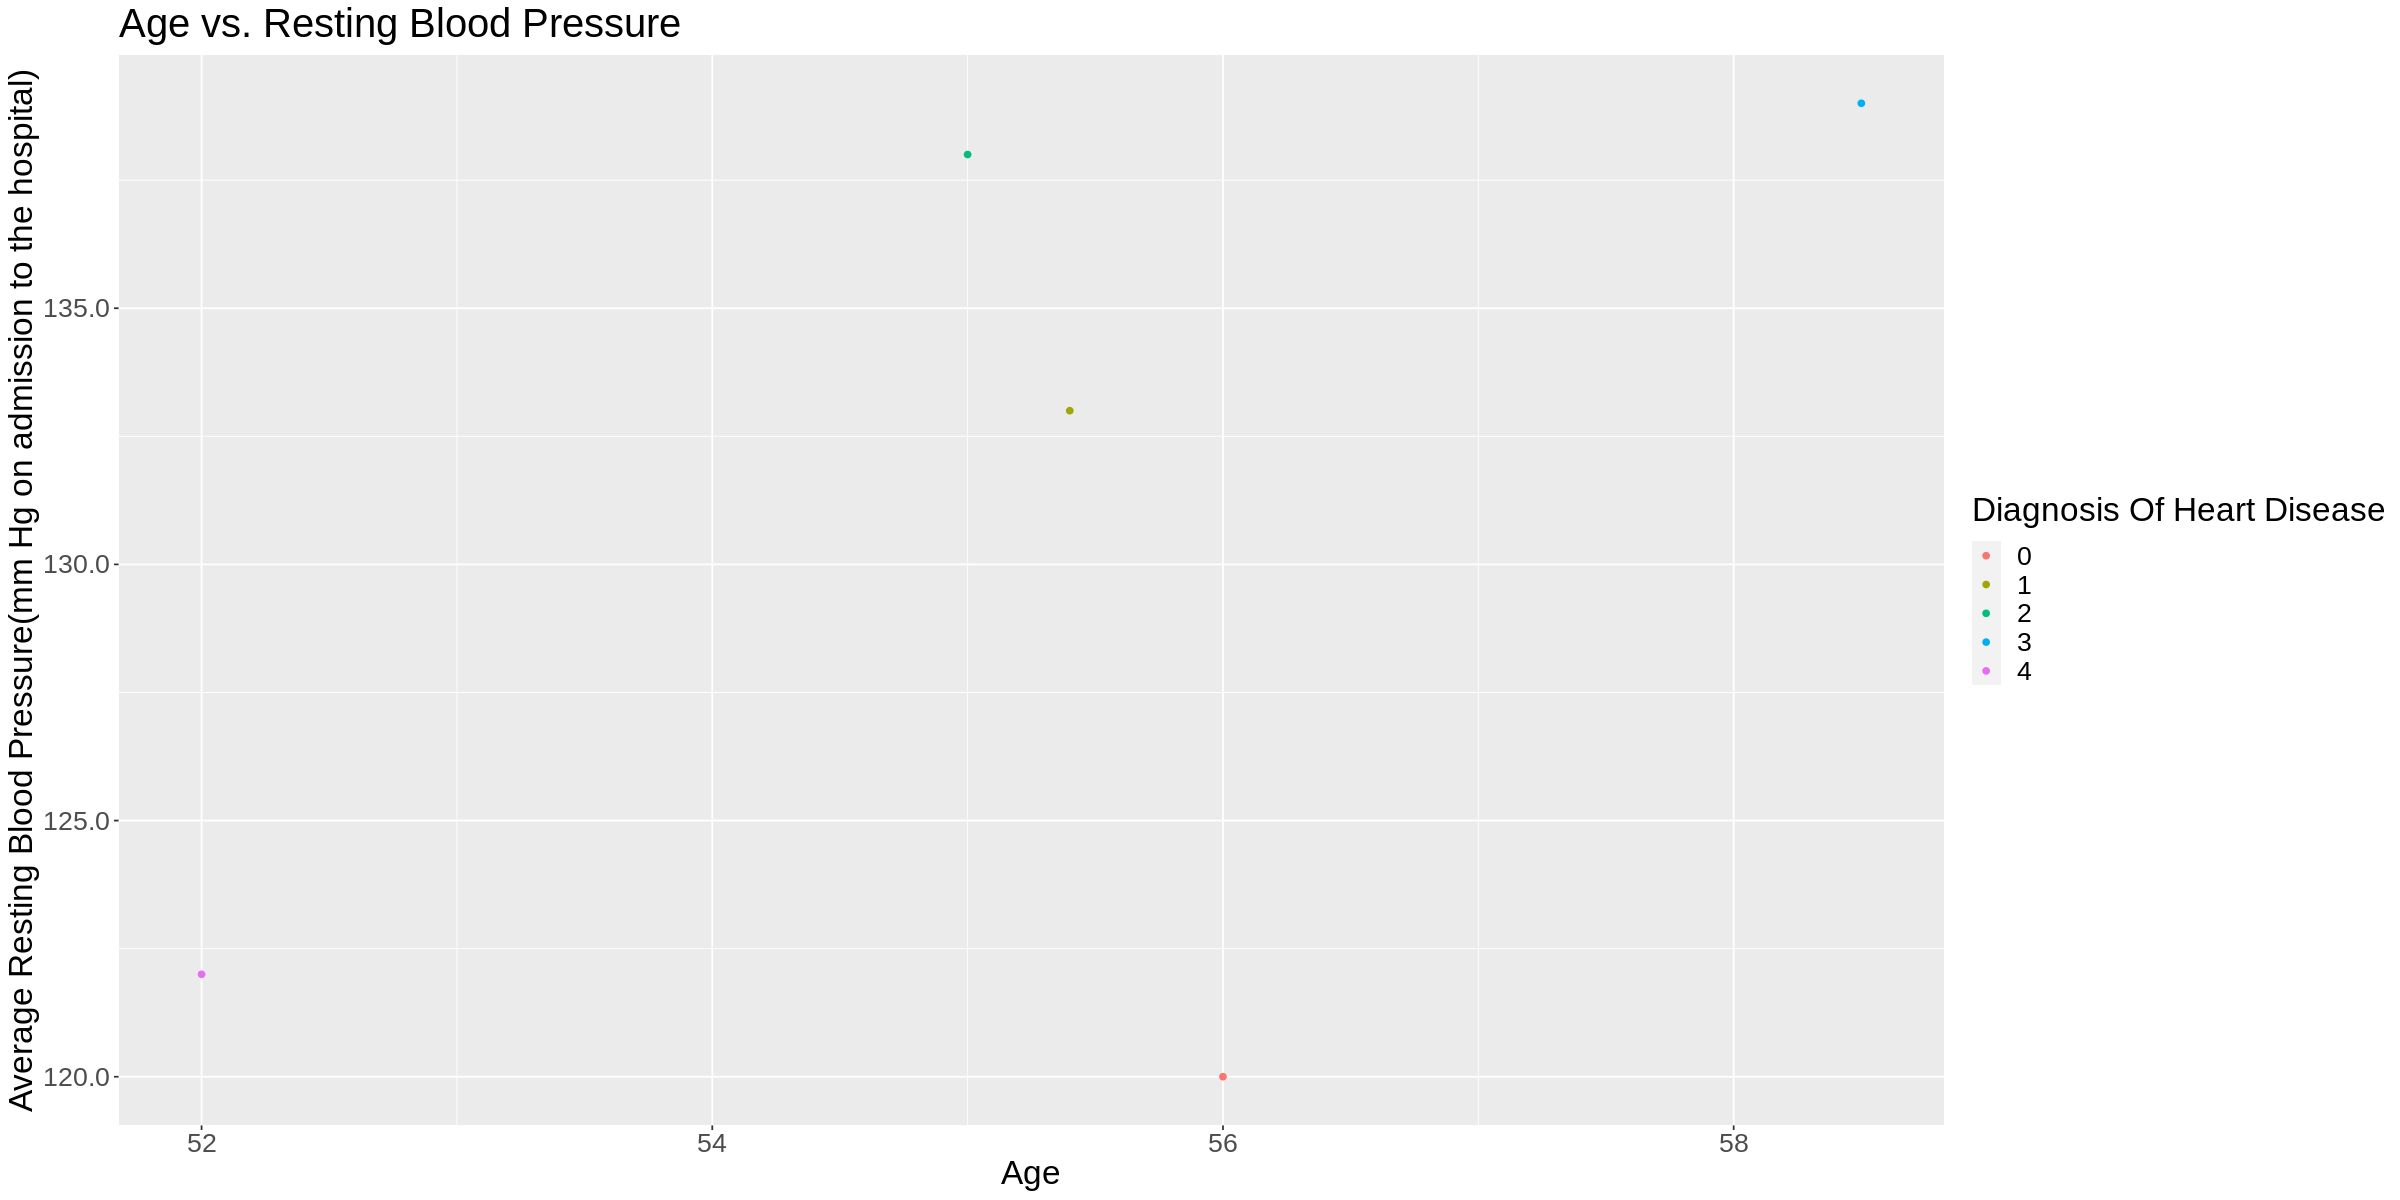

In [191]:
# Plot for age vs. resting blood pressure

options(repr.plot.width = 20, repr.plot.height = 10)

resting_BP_plot <- heart_disease_data_sum %>%
                    ggplot(aes(x = avg_age, y = avg_resting_BP, color = diagnosis))+
                    geom_point()+
                    labs(x = "Age", y = "Average Resting Blood Pressure(mm Hg on admission to the hospital)", colour = "Diagnosis Of Heart Disease")+
                    ggtitle("Age vs. Resting Blood Pressure")+
                    theme(text = element_text(size = 20))+
                    scale_y_continuous(labels = scales::comma)
resting_BP_plot

METHODS

EXPECTED OUTCOMES / SIGNIFICANCE